In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv('data/snsdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [3]:
df = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(df)
df[0][0]

KeyError: 0

In [ ]:
k_means = KMeans(n_clusters=9, random_state=42)
k_means.fit(X_norm)

KMeans(n_clusters=9, random_state=42)

In [ ]:
print (round(k_means.inertia_, 2))

858197.04


In [ ]:
df=pd.DataFrame(df)
df.loc[:, 'label']=k_means.labels_
df.label.value_counts()

0    19330
8     4358
1     2632
6      919
3      850
7      763
5      659
4      488
2        1
Name: label, dtype: int64

In [ ]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

In [ ]:
res = {"inertia": [], "cluster": []}
for i in np.arange(3, 10):
    res['inertia'].append(get_inertia(i, X_norm))
    res['cluster'].append(i)
    

<AxesSubplot:xlabel='cluster', ylabel='inertia'>

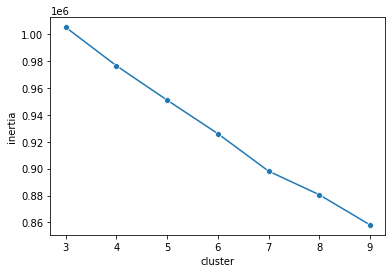

In [ ]:
sns.lineplot(data=res, x="cluster", y="inertia", marker= "o")

In [ ]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    model = KMeans(n_clusters=cluster_num, random_state=42)
    model.fit(X)
    silhouette = silhouette_score(X, model.labels_, metric='euclidean')
    return silhouette

silhoette_res = {'silhoette': [], 'clusters': []}

for i in np.arange(3, 10):
    silhoette_res['silhoette'].append(get_silhouette(i, X_norm))
    silhoette_res['clusters'].append(i)
    

In [ ]:
silhoette_res

{'silhoette': [0.27330859726507056,
  0.25772244966436714,
  0.2779713159156073,
  0.26324211860540725,
  0.2659421900140592,
  0.275080535116179,
  0.26108251283351247],
 'clusters': [3, 4, 5, 6, 7, 8, 9]}

<AxesSubplot:xlabel='clusters', ylabel='silhoette'>

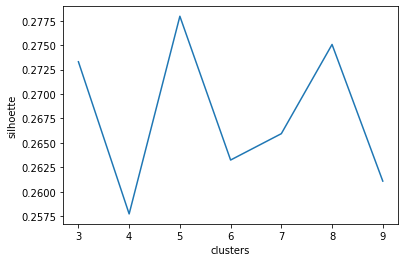

In [ ]:
sns.lineplot(data = silhoette_res, x='clusters', y='silhoette')

In [ ]:
df=df.drop('label', axis=1)

In [ ]:
best_model = KMeans(n_clusters=3, random_state=42)
best_model.fit(X_norm)
df['label']=best_model.predict(X_norm)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,label
0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,2
1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0
2,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908,2
3,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,2
4,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316,1


In [ ]:
df['label'].value_counts()

2    19960
0     8884
1     1156
Name: label, dtype: int64

In [ ]:
df.groupby('label')

In [ ]:
top_list = []
for label, group in df.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

set()

In [ ]:
top_list

[{0, 1, 4, 7, 10, 15, 17, 27, 28, 30},
 {11, 14, 18, 19, 24, 29, 32, 33, 34, 35},
 {2, 8, 11, 12, 22, 23, 26, 32, 33, 34}]

In [ ]:
from sklearn.mixture import  GaussianMixture
model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X_norm)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([23467,  6532,     1], dtype=int64))

In [7]:
a = np.sqrt(45) + np.sqrt(58) + np.sqrt(65) + np.sqrt(80)

In [8]:
round (a/4, 1)

7.8